## Importando bibliotecas

In [1]:
import pandas as pd
import openpyxl

## Carregando dados

In [2]:
df = pd.read_excel('https://github.com/TrainingByPackt/Data-Science-Projects-with-Python/raw/master/Data/default_of_credit_card_clients__courseware_version_1_21_19.xls')
df.shape

(30000, 25)

## Entendendo contexto/problema

Cliente = Empresa de Cartão de Crédito

Dados históricos = 6 meses de 30 mil clientes

Objetivo = *Modelo capaz de prever se uma conta/cliente ficará inadimplente no próximo mês.*

## Verificando integridade dos dados

In [3]:
print("Total de colunas", len(df.columns), "\n")
df.columns

Total de colunas 25 



Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## Dicionário de dados 

### Informações do Conjunto de Dados

Esta pesquisa utilizou uma variável binária, pagamento padrão (Sim = 1, Não = 0), como variável de resposta. Este estudo revisou a literatura e utilizou as seguintes 23 variáveis como variáveis explicativas:

1. **X1: Valor do crédito concedido (em dólares taiwaneses - NT)**
   - Inclui tanto o crédito individual do consumidor quanto o crédito familiar (suplementar).

2. **X2: Gênero**
   - 1 = Masculino
   - 2 = Feminino

3. **X3: Educação**
   - 1 = Pós-graduação
   - 2 = Universidade
   - 3 = Ensino médio
   - 4 = Outros

4. **X4: Estado Civil**
   - 1 = Casado
   - 2 = Solteiro
   - 3 = Outros

5. **X5: Idade (em anos)**

6. **X6 - X11: Histórico de Pagamento Anterior**
   - X6 = Status de pagamento em setembro de 2005
   - X7 = Status de pagamento em agosto de 2005
   - ...
   - X11 = Status de pagamento em abril de 2005
   - Escala de medição: -1 = Pagar pontualmente; 1 = Atraso no pagamento por um mês; 2 = Atraso no pagamento por dois meses; ...; 8 = Atraso no pagamento por oito meses; 9 = Atraso no pagamento por nove meses ou mais.

7. **X12-X17: Valor do Extrato da Fatura (em dólares taiwaneses)**
   - X12 = Valor do extr


In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Verificando ID

In [5]:
df["ID"].nunique()

29687

In [6]:
id_counts = df["ID"].value_counts()
id_counts.head()

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: count, dtype: int64

In [7]:
id_counts.value_counts()

count
1    29374
2      313
Name: count, dtype: int64

## Corrigindo dados duplicados

In [8]:
dupe_mask = id_counts == 2
dupe_mask[:5]

ID
ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: count, dtype: bool

In [9]:
dupe_ids = id_counts.index[dupe_mask]

In [10]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [11]:
dupe_ids[:5]

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

In [12]:
df.loc[df["ID"].isin(dupe_ids[0:3]), :].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_zero_mask = df == 0

In [14]:
feature_zero_mask = df_zero_mask.iloc[:, 1:].all(axis=1)

In [15]:
sum(feature_zero_mask)

315

In [16]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [17]:
df_clean_1.shape

(29685, 25)

In [18]:
df_clean_1['ID'].nunique()

29685

## Explorando e limpando dados

In [19]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


In [20]:
df_clean_1['PAY_1'].head()

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

### Contagem de valores unicos

In [21]:
df_clean_1['PAY_1'].value_counts()

PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

### Criando mascara booleana para remover valores ausentes

In [22]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [23]:
sum(valid_pay_1_mask)

26664

In [24]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

### Verificando shape do dataframe

In [25]:
df_clean_2.shape

(26664, 25)

In [26]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [27]:
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


### Explicaçõea dicionais sobre as colunas feitas por sócio da empresa

* -2: significa que começou o mes sem valor a ser pago e o crédito não foi usado.
* -1: significa que usou um valor que foi totalmente pago.
*  0: significa que o pagamento minimo foi feito, mas o saldo total devedor não foi pago.

## 6. Explorando o limite de crédito e as características demográficas

### 6.1 Importando Biblioteca e Configurando o Matplotlib

In [28]:
import matplotlib.pyplot as plt

%matplotlib inline

### 6.2 Gerando histogramas para AGE e LIMIT_BAL

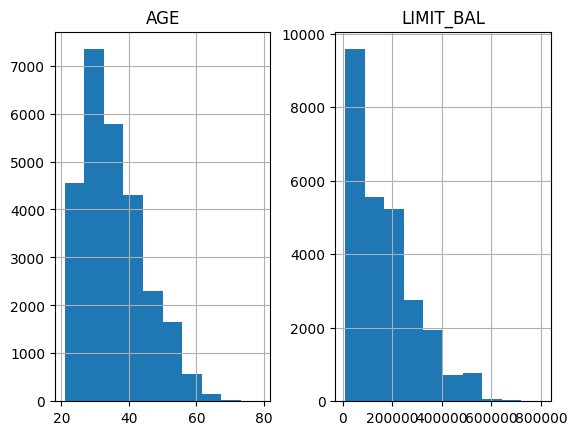

In [29]:
df_clean_2[['AGE', 'LIMIT_BAL']].hist();

### 6.3 Estatística Descritiva de AGE e LIMIT_BAL

In [30]:
df_clean_2[['AGE', 'LIMIT_BAL']].describe()

,AGE,LIMIT_BAL
count,26664.000000,26664.000000
mean,35.505213,167919.054905
std,9.227442,129839.453081
min,21.000000,10000.000000
25%,28.000000,50000.000000
50%,34.000000,140000.000000
75%,41.000000,240000.000000
max,79.000000,800000.000000


### 6.4 Contagem de ocorrencias por categoria EDUCATION

In [31]:
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

### 6.5 Transformando 0,5 e 6 em outros(4)

In [32]:
df_clean_2['EDUCATION'].replace(to_replace= [0,5,6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

### 6.6 Contagem de ocorrencias por categoria em MARRIAGE

In [33]:
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

In [34]:
df_clean_2['MARRIAGE'].replace(to_replace= 0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

### Caracteristicas categóricas (Experimento)

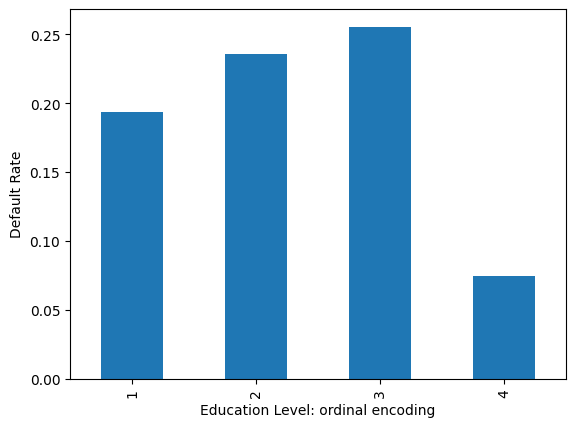

In [35]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month': 'mean'}).plot.bar(legend=False)
plt.ylabel('Default Rate')
plt.xlabel('Education Level: ordinal encoding');

## 7. Implementando a OHE para uma característica categórica

### 7.1 Criando coluna vazia

In [36]:
df_clean_2['EDUCATION_CAT'] = 'none'

### 7.2 Examinando as primeiras 10 linhas

In [37]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


### 7.3 Criando dicionário de mapeamento de categorias

In [38]:
cat_mapping = {
    1: 'graduate school',
    2: 'university',
    3: 'high school',
    4: 'others'
}
cat_mapping

{1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others'}

### 7.4 Aplicando o mapeamento de categorias

In [39]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


### 7.5 Codificação de características com OHE

In [42]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,True,False,False,False
6,True,False,False,False
7,False,False,False,True
8,False,True,False,False
9,False,True,False,False


### 7.6 Concatenando o dataframe original com OHE

In [47]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']].head(10)


,EDUCATION_CAT,graduate school,high school,others,university
0,university,False,False,False,True
1,university,False,False,False,True
2,university,False,False,False,True
3,university,False,False,False,True
4,university,False,False,False,True
5,graduate school,True,False,False,False
6,graduate school,True,False,False,False
7,university,False,False,False,True
8,high school,False,True,False,False
9,high school,False,True,False,False


In [49]:
df_with_ohe.to_csv('chapter_1_cleaned_data.csv', index= False)